# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
#read the dataset
df=pd.read_csv('E:\Desktop\Datasets\Deep Learning\Bank Customer Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.shape

(10000, 14)

In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
#check if the dataset is imbalanced
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

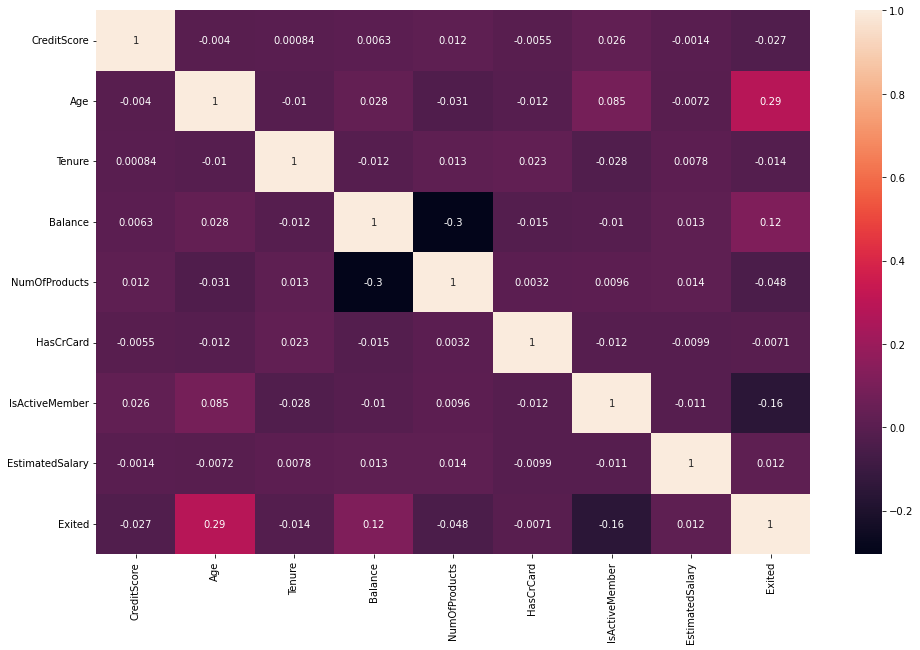

In [12]:
#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True) #mask->copy(only show the False values location of df.corr() output)
plt.show()

In [13]:
import category_encoders as ce #import the library for encoding categorical variables into numeric 

In [14]:
#Geography
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Geography'])# fit and transform to get the encoded data
df1=OHE.fit_transform(df['Geography'])

In [15]:
#Gender
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Gender'])# fit and transform to get the encoded data
df2=OHE.fit_transform(df['Gender'])

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df1.head()

,Geography_1,Geography_2,Geography_3
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [18]:
df2.head()

,Gender_1,Gender_2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [19]:
df=pd.concat([df,df1, df2], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


In [20]:
df.drop(['Gender','Geography'],axis=1,inplace=True)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


In [22]:
#Train Test Split
x=df.drop(columns=['Exited','HasCrCard']) #according to the heatmap, HasCrCard has very small effect to the Exited output
y=df['Exited']
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.1, random_state=1)

In [23]:
x_train.shape

(9000, 12)

In [24]:
x_test.shape

(1000, 12)

In [25]:
#scaling the input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Standard Scaler object
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# Model building using tensorflow

In [26]:
#import the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [27]:
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=12))
model.add(Dense(units=24, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [29]:
model.fit(x_train_scaled, y_train, epochs=50,batch_size=20)

Epoch 1/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4684 - accuracy: 0.8014
Epoch 2/50
450/450 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8191
Epoch 3/50
450/450 [==============================] - 1s 1ms/step - loss: 0.3946 - accuracy: 0.8317
Epoch 4/50
450/450 [==============================] - 1s 3ms/step - loss: 0.3790 - accuracy: 0.8432
Epoch 5/50
450/450 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8473
Epoch 6/50
450/450 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8544
Epoch 7/50
450/450 [==============================] - 1s 2ms/step - loss: 0.3531 - accuracy: 0.8551
Epoch 8/50
450/450 [==============================] - 2s 4ms/step - loss: 0.3496 - accuracy: 0.8591
Epoch 9/50
450/450 [==============================] - 1s 3ms/step - loss: 0.3474 - accuracy: 0.8599
Epoch 10/50
450/450 [==============================] - 1s 3ms/step - loss: 0.3452 - accuracy: 0.8587

# Model Evaluation

In [30]:
y_pred=model.predict(x_test_scaled)
y_pred=[0 if val<0.5 else 1 for val in y_pred]

In [31]:
accuracy_score(y_test,y_pred)

0.868

# Model building using pytorch

In [33]:
import torch
import torch.nn as nn